In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
dataset = pd.read_csv("Credit_Card_Applications.csv")

dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [122]:
X = dataset.drop("Class", axis = 1)
y = dataset.Class

## Feature Scaling

In [123]:
from sklearn.preprocessing import MinMaxScaler 

sc = MinMaxScaler(feature_range = (0,1))

X = sc.fit_transform(X)

In [106]:
from minisom import MiniSom

In [124]:
som = MiniSom(x = 10, 
              y = 10, 
              input_len = 15, 
              sigma = 1.0, 
              learning_rate = 0.5)

In [142]:
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

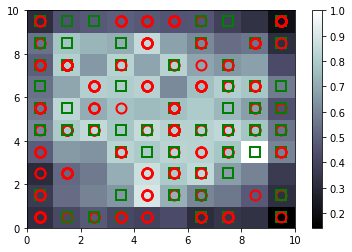

In [143]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ["o","s"]
colors = ["r","g"]

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = "None",
        markersize = 10,
        markeredgewidth = 2)
    

## Find the frauds

In [100]:
mappings = som.win_map(X)

In [144]:
frauds = mappings[(8,3)]
frauds = sc.inverse_transform(frauds)
fraud_list = []

for i in range(len(frauds)):
    fraud_list.append(frauds[i][0])

In [145]:
fraud_list

[15692408.0,
 15694530.0,
 15667451.0,
 15730287.0,
 15736510.0,
 15617065.0,
 15632275.0,
 15737542.0,
 15656417.0,
 15748986.0,
 15652667.0]